In [1]:
pip install pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [3]:
data = pd.read_csv('Alzheimers dataset.csv')

# Displaying the first few rows of the dataset to get an overview
data.head()

,Birth Year,Sex,Years of Education,Cognitive Decline due to Cardiovascular Issues,Cognitive Decline due to Stroke,Memory Score,Decision-Making Cognitive Decline,Cognitive Memory Assessment,Cognitive Orientation Assessment,Cognitive Judgment Assessment,...,Alcohol Occasional Use,Alcohol Frequency,Alcohol Consumption,Alcohol Dementia,Alcohol-Induced Dementia,Alcohol Abuse,Family History of Cognitive Decline,Other Biomarkers,Other Biomarker Details,Neuropsychological Genetics
0,1939,2,16,-4,-4,0.5,1,1,0,1,...,-4,-4,-4,0,7,8,0,0,NaN,-4.0
1,1944,1,18,-4,-4,0.5,1,1,0,1,...,1,2,0,0,7,8,0,0,NaN,-4.0
2,1956,2,10,1,0,2.0,-4,1,-4,1,...,-4,-4,0,0,7,-4,1,-4,NaN,-4.0
3,1924,2,14,-4,-4,2.0,1,1,1,1,...,-4,-4,-4,0,7,8,0,0,NaN,-4.0
4,1950,1,16,8,8,0.0,-4,0,-4,0,...,-4,-4,0,8,8,-4,0,-4,NaN,-4.0


In [4]:
# Checking the shape of the dataset
print(f"Dataset Shape: {data.shape}")

Dataset Shape: (19209, 58)


In [5]:
#coloumns of the dataset
data.columns

Index(['Birth Year', 'Sex', 'Years of Education',
       'Cognitive Decline due to Cardiovascular Issues',
       'Cognitive Decline due to Stroke', 'Memory Score',
       'Decision-Making Cognitive Decline', 'Cognitive Memory Assessment',
       'Cognitive Orientation Assessment', 'Cognitive Judgment Assessment',
       'Cognitive Language Assessment', 'Cognitive Visual Assessment',
       'Cognitive Attention Assessment', 'Cognitive Fluctuations',
       'Cognitive Flag Ongoing', 'Other Cognitive Symptoms',
       'Other Cognitive Symptoms Explanation', 'NACC Cognitive Function',
       'Cognitive Mode', 'Cognitive Mode Explanation', 'MMSE Completion',
       'MMSE Location', 'MMSE Language', 'MMSE Language Explanation',
       'MMSE Vision', 'MMSE Hearing', 'MMSE Orientation Date',
       'MMSE Orientation Location', 'NACC MMSE Score', 'Cognitive Status',
       'Normal Cognitive Function', 'Other Cognitive Function',
       'Other Cognitive Function Identified',
       'Other Cogni

In [6]:
#information about the dataset 
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19209 entries, 0 to 19208
Data columns (total 58 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Birth Year                                      19209 non-null  int64  
 1   Sex                                             19209 non-null  int64  
 2   Years of Education                              19209 non-null  int64  
 3   Cognitive Decline due to Cardiovascular Issues  19209 non-null  int64  
 4   Cognitive Decline due to Stroke                 19209 non-null  int64  
 5   Memory Score                                    19209 non-null  float64
 6   Decision-Making Cognitive Decline               19209 non-null  int64  
 7   Cognitive Memory Assessment                     19209 non-null  int64  
 8   Cognitive Orientation Assessment                19209 non-null  int64  
 9   Cognitive Judgment Assessment          

In [7]:
# Columns to keep for Alzheimer's disease prediction
columns_to_keep = [
    'Birth Year',               # Proxy for age
    'Sex',                      # Gender could influence cognitive decline
    'Years of Education',       # Education might impact cognitive health
    'Cognitive Decline due to Cardiovascular Issues',
    'Cognitive Decline due to Stroke',
    'Memory Score',             # Core cognitive indicator
    'Decision-Making Cognitive Decline',
    'Cognitive Memory Assessment',
    'Cognitive Orientation Assessment',
    'Cognitive Judgment Assessment',
    'Family History of Cognitive Decline', # Genetic predisposition
    'Other Biomarkers',         # Biological markers can provide insights
    'Neuropsychological Genetics'
]

# Removing unnecessary columns
df = data[columns_to_keep]

# Display the cleaned dataset with only relevant columns
df.head()



,Birth Year,Sex,Years of Education,Cognitive Decline due to Cardiovascular Issues,Cognitive Decline due to Stroke,Memory Score,Decision-Making Cognitive Decline,Cognitive Memory Assessment,Cognitive Orientation Assessment,Cognitive Judgment Assessment,Family History of Cognitive Decline,Other Biomarkers,Neuropsychological Genetics
0,1939,2,16,-4,-4,0.5,1,1,0,1,0,0,-4.0
1,1944,1,18,-4,-4,0.5,1,1,0,1,0,0,-4.0
2,1956,2,10,1,0,2.0,-4,1,-4,1,1,-4,-4.0
3,1924,2,14,-4,-4,2.0,1,1,1,1,0,0,-4.0
4,1950,1,16,8,8,0.0,-4,0,-4,0,0,-4,-4.0


In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print(f"Missing Values: \n{missing_values}")

Missing Values: 
Birth Year                                           0
Sex                                                  0
Years of Education                                   0
Cognitive Decline due to Cardiovascular Issues       0
Cognitive Decline due to Stroke                      0
Memory Score                                         0
Decision-Making Cognitive Decline                    0
Cognitive Memory Assessment                          0
Cognitive Orientation Assessment                     0
Cognitive Judgment Assessment                        0
Family History of Cognitive Decline                  0
Other Biomarkers                                     0
Neuropsychological Genetics                       2712
dtype: int64


In [9]:
# Impute missing values in 'Neuropsychological Genetics' with the median
df['Neuropsychological Genetics'] = df['Neuropsychological Genetics'].fillna(
    df['Neuropsychological Genetics'].median())

# Check if the missing values have been imputed
missing_values_after_imputation = df.isnull().sum()
print(missing_values_after_imputation)


Birth Year                                        0
Sex                                               0
Years of Education                                0
Cognitive Decline due to Cardiovascular Issues    0
Cognitive Decline due to Stroke                   0
Memory Score                                      0
Decision-Making Cognitive Decline                 0
Cognitive Memory Assessment                       0
Cognitive Orientation Assessment                  0
Cognitive Judgment Assessment                     0
Family History of Cognitive Decline               0
Other Biomarkers                                  0
Neuropsychological Genetics                       0
dtype: int64


/var/folders/ww/3_fjkv0x29ggs63lp0s_hx2c0000gn/T/ipykernel_61839/3314800443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Neuropsychological Genetics'] = df['Neuropsychological Genetics'].fillna(


In [10]:
# Check for duplicate rows in the dataset
print("Number of duplicate rows in the dataset before removal:")
duplicates_before = df.duplicated().sum()
print(duplicates_before)

# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Check for duplicates again to confirm removal
print("\nNumber of duplicate rows in the dataset after removal:")
duplicates_after = df_cleaned.duplicated().sum()
print(duplicates_after)


Number of duplicate rows in the dataset before removal:
5973

Number of duplicate rows in the dataset after removal:
0


In [11]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13236 entries, 0 to 19206
Data columns (total 13 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Birth Year                                      13236 non-null  int64  
 1   Sex                                             13236 non-null  int64  
 2   Years of Education                              13236 non-null  int64  
 3   Cognitive Decline due to Cardiovascular Issues  13236 non-null  int64  
 4   Cognitive Decline due to Stroke                 13236 non-null  int64  
 5   Memory Score                                    13236 non-null  float64
 6   Decision-Making Cognitive Decline               13236 non-null  int64  
 7   Cognitive Memory Assessment                     13236 non-null  int64  
 8   Cognitive Orientation Assessment                13236 non-null  int64  
 9   Cognitive Judgment Assessment               

# EDA

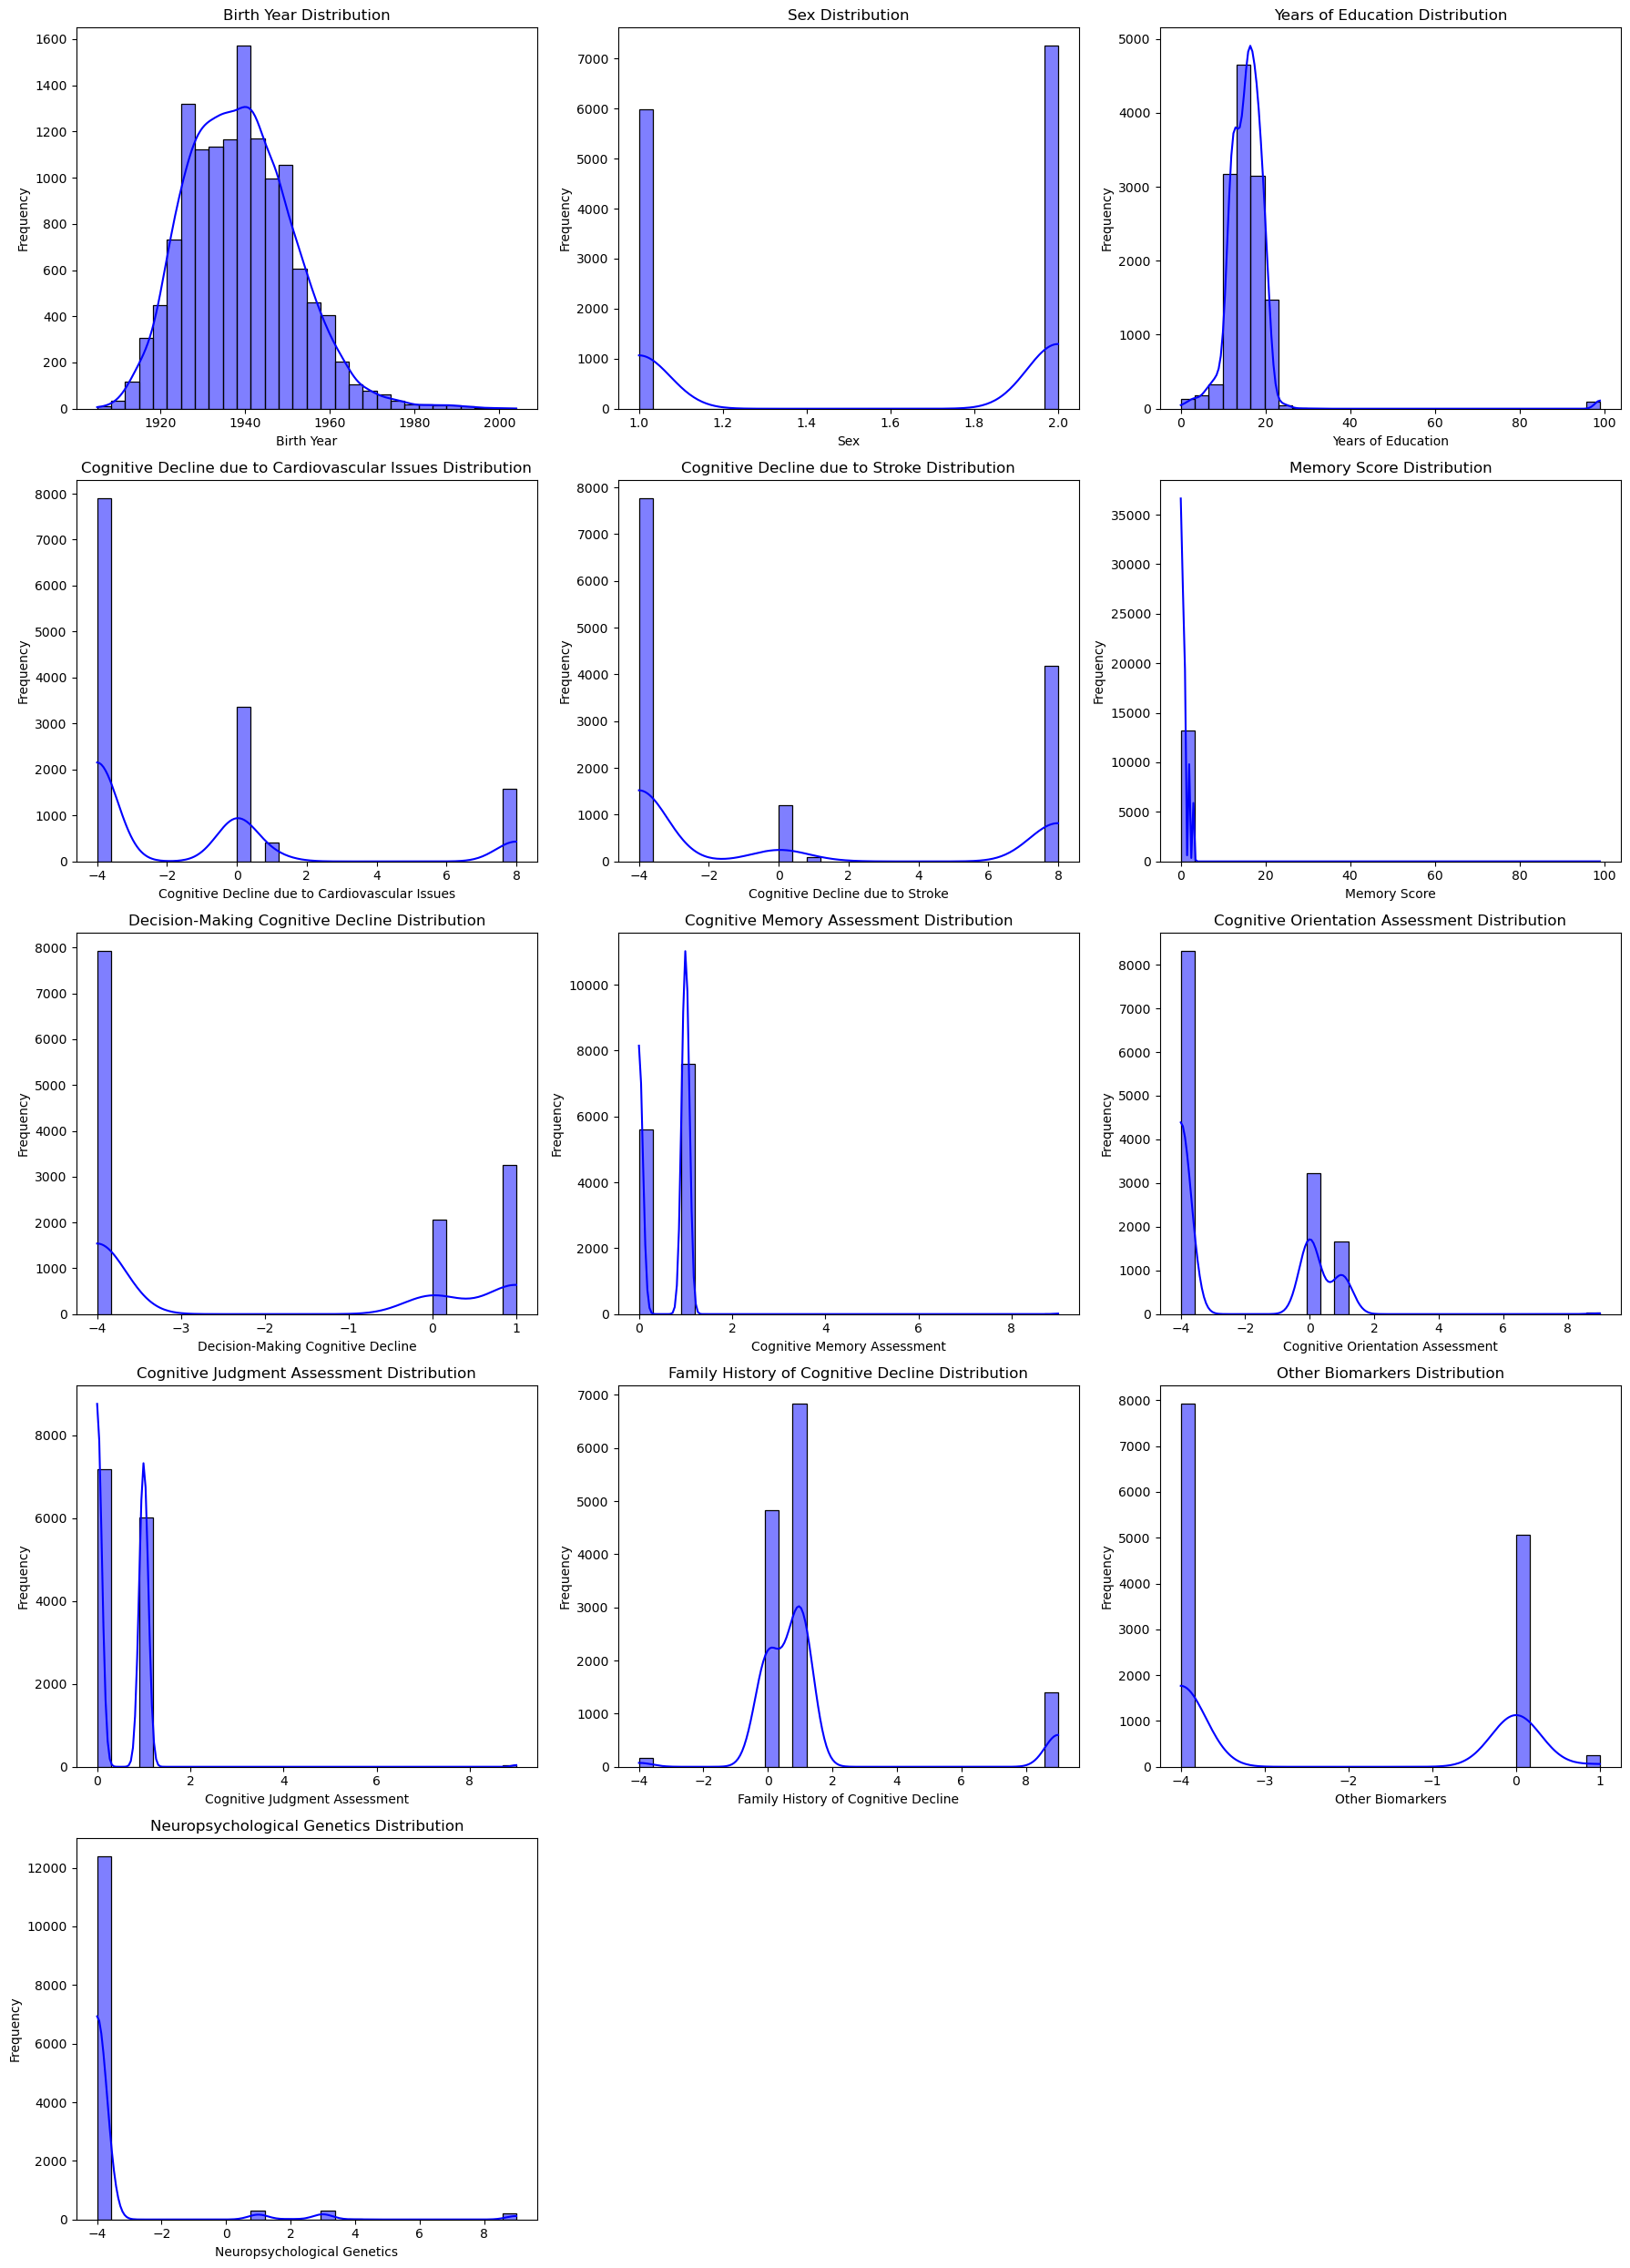

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Identify numerical features
numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Determine the grid size based on the number of numerical features
num_features = len(numerical_cols)
rows = math.ceil(num_features / 3)  # 3 columns per row

# Plot numerical variables
plt.figure(figsize=(18, rows * 5))  # Adjust height dynamically
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(df_cleaned[col], kde=True, bins=30, color='blue')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Correlation analysis

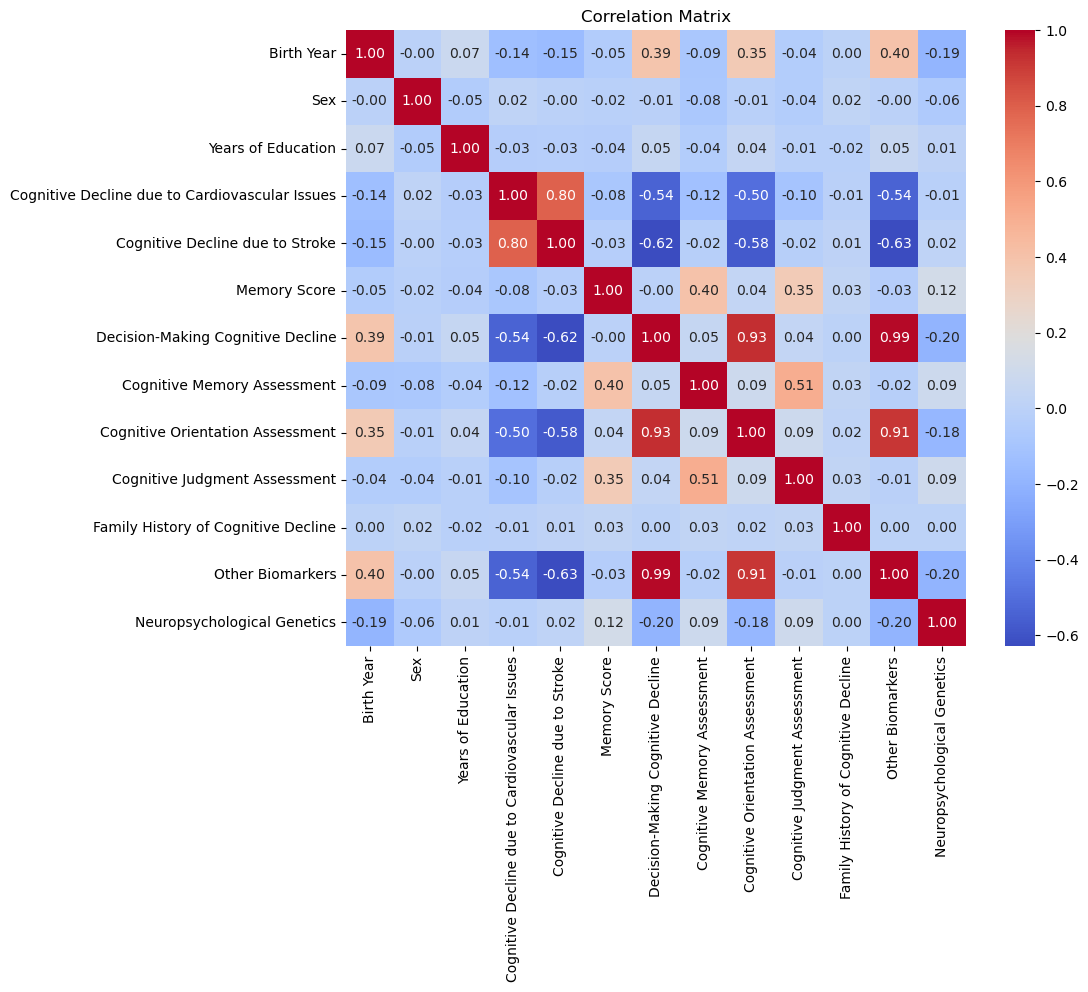

In [13]:
import seaborn as sns

# Correlation matrix to check relationships between features
plt.figure(figsize=(10, 8))
corr_matrix = df_cleaned.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

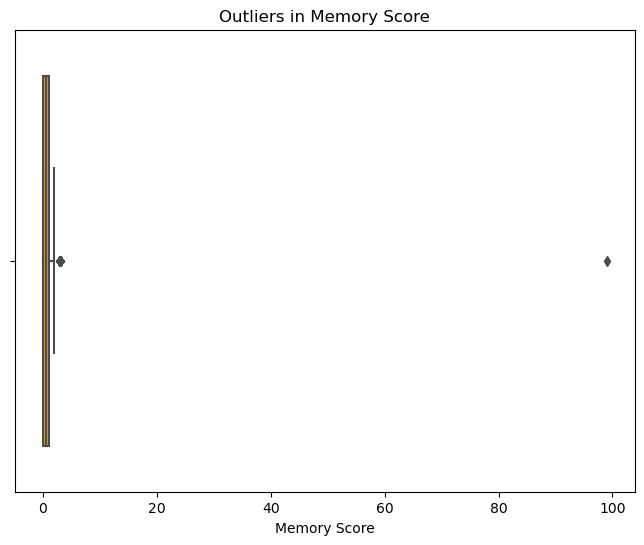

In [14]:
# Boxplot to detect outliers in memory score
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cleaned['Memory Score'], color='orange')
plt.title('Outliers in Memory Score')
plt.show()

In [15]:
# Removing outliers using the IQR method for Memory Score
Q1 = df_cleaned['Memory Score'].quantile(0.25)
Q3 = df_cleaned['Memory Score'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to remove outliers in the Memory Score
alzheimers_data_no_outliers = df_cleaned[
    (df_cleaned['Memory Score'] >= lower_bound) & 
    (df_cleaned['Memory Score'] <= upper_bound)
]

print(f"Original dataset size: {df_cleaned.shape[0]}")
print(f"Dataset size after outlier removal: {alzheimers_data_no_outliers.shape[0]}")


Original dataset size: 13236
Dataset size after outlier removal: 12428


In [16]:
from sklearn.impute import SimpleImputer

# Define the features and target variable after removing outliers
X = alzheimers_data_no_outliers.drop(columns=['Memory Score'])
y = alzheimers_data_no_outliers['Memory Score']

# Use the median to fill missing values
imputer = SimpleImputer(strategy='median')

# Apply the imputer to the feature set
X_imputed = imputer.fit_transform(X)

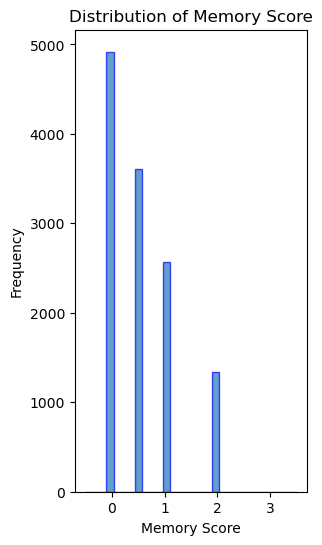

In [17]:
import matplotlib.pyplot as plt

# Confirming the range of Memory Score and adjusting the histogram
plt.figure(figsize=(3, 6))
plt.hist(alzheimers_data_no_outliers['Memory Score'], bins=30, range=(-0.5, 3.5), edgecolor='blue', alpha=0.7)
plt.title('Distribution of Memory Score')
plt.xlabel('Memory Score')
plt.ylabel('Frequency')
plt.show()

# Feature Engineering

Correlation with Memory Score:
Memory Score                                      1.000000
Cognitive Memory Assessment                       0.398785
Cognitive Judgment Assessment                     0.346163
Stroke_to_Decision_Ratio                          0.152966
Neuropsychological Genetics                       0.121781
Genetics_to_Age_Ratio                             0.121650
Cognitive Orientation Assessment                  0.038284
Family History of Cognitive Decline               0.031432
Decision-Making Cognitive Decline                -0.001524
Sex                                              -0.015292
Biomarker_to_Age_Ratio                           -0.023148
Cognitive Decline due to Stroke                  -0.029957
Other Biomarkers                                 -0.034151
Years of Education                               -0.036310
Education_to_Age_Ratio                           -0.044053
Birth Year                                       -0.049076
Cardiovascular_to_Age_Rat

/var/folders/ww/3_fjkv0x29ggs63lp0s_hx2c0000gn/T/ipykernel_61839/751195803.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Education_to_Age_Ratio'] = df_cleaned['Years of Education'] / (2024 - df_cleaned['Birth Year'] + 1)  # Avoid division by zero
/var/folders/ww/3_fjkv0x29ggs63lp0s_hx2c0000gn/T/ipykernel_61839/751195803.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cardiovascular_to_Age_Ratio'] = df_cleaned['Cognitive Decline due to Cardiovascular Issues'] / (
/var/folde

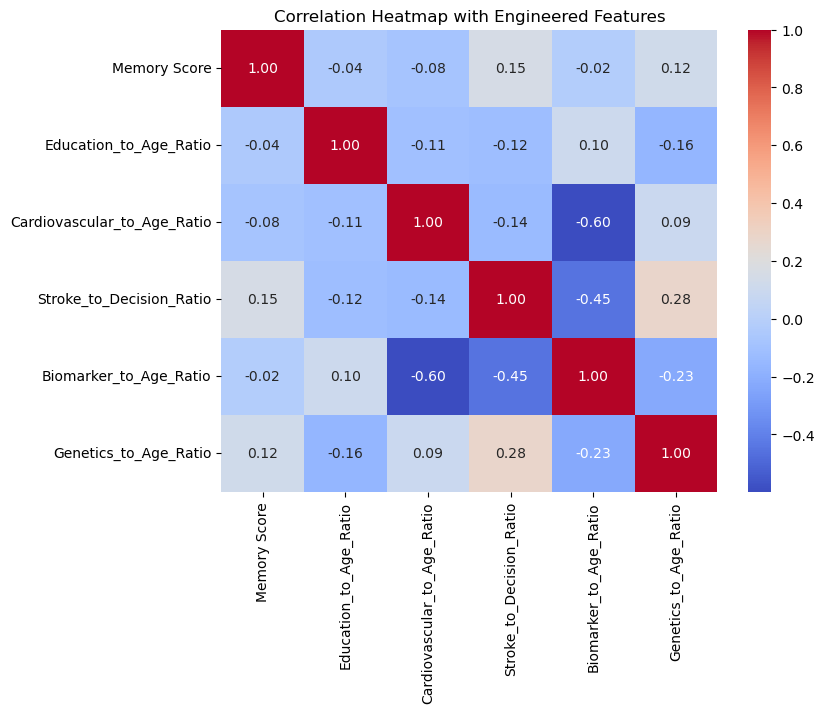

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_cleaned is the cleaned dataset from previous steps

# Step 1: Create Feature Ratios
df_cleaned['Education_to_Age_Ratio'] = df_cleaned['Years of Education'] / (2024 - df_cleaned['Birth Year'] + 1)  # Avoid division by zero
df_cleaned['Cardiovascular_to_Age_Ratio'] = df_cleaned['Cognitive Decline due to Cardiovascular Issues'] / (
    2024 - df_cleaned['Birth Year'] + 1)  # Avoid division by zero
df_cleaned['Stroke_to_Decision_Ratio'] = df_cleaned['Cognitive Decline due to Stroke'] / (
    df_cleaned['Decision-Making Cognitive Decline'] + 1)  # Avoid division by zero
df_cleaned['Biomarker_to_Age_Ratio'] = df_cleaned['Other Biomarkers'] / (
    2024 - df_cleaned['Birth Year'] + 1)  # Avoid division by zero
df_cleaned['Genetics_to_Age_Ratio'] = df_cleaned['Neuropsychological Genetics'] / (
    2024 - df_cleaned['Birth Year'] + 1)  # Avoid division by zero

# Step 2: Check Correlations with Memory Score
correlations = df_cleaned.corr()['Memory Score'].sort_values(ascending=False)
print("Correlation with Memory Score:")
print(correlations)

# Step 3: Plot Correlation Heatmap for Engineered Features
plt.figure(figsize=(8, 6))
engineered_features = [
    'Memory Score', 'Education_to_Age_Ratio', 'Cardiovascular_to_Age_Ratio',
    'Stroke_to_Decision_Ratio', 'Biomarker_to_Age_Ratio', 'Genetics_to_Age_Ratio'
]
sns.heatmap(df_cleaned[engineered_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap with Engineered Features')
plt.show()



In [19]:


from sklearn.model_selection import train_test_split

# Convert the target variable to categorical
y_categorical = y.astype('category').cat.codes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_categorical, test_size=0.2, random_state=42)



In [ ]:
#The output variable, `y_categorical`, has been correctly converted to a numerical categorical format using `astype('category').cat.codes`. 
#This transformation ensures that the target variable is compatible with machine learning algorithms, which require numerical or discrete class labels for classification tasks. 
#Each unique category in the original target variable is assigned a unique integer code, making it suitable for model training and evaluation.

# Logistic regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Initialize the logistic regression model with adjusted parameters
log_reg = LogisticRegression(
    max_iter=5000,  # Increased maximum iterations
    random_state=42,
    solver='saga',  # Efficient for large datasets and supports multinomial
    multi_class='multinomial',
    class_weight='balanced',  # Handles class imbalance
    C=0.1  # Adds stronger regularization
)

# Train the logistic regression model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy_log = accuracy_score(y_test, y_pred)
precision_log = precision_score(y_test, y_pred, average='weighted')
recall_log = recall_score(y_test, y_pred, average='weighted')
f1_log = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_log:.2f}")
print(f"Precision: {precision_log:.2f}")
print(f"Recall: {recall_log:.2f}")
print(f"F1 Score: {f1_log:.2f}")


# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))






Logistic Regression Results:
Accuracy: 0.62
Precision: 0.66
Recall: 0.62
F1 Score: 0.62

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       959
           1       0.75      0.39      0.52       753
           2       0.40      0.42      0.41       504
           3       0.26      0.44      0.33       270

    accuracy                           0.62      2486
   macro avg       0.56      0.55      0.54      2486
weighted avg       0.66      0.62      0.62      2486



# Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=None,       # Maximum depth of the tree (None means no limit)
    class_weight='balanced'  # Handles class imbalance
)

# Train the Decision Tree model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred)
precision_dt = precision_score(y_test, y_pred, average='weighted')
recall_dt = recall_score(y_test, y_pred, average='weighted')
f1_dt = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy_dt:.2f}")
print(f"Precision: {precision_dt:.2f}")
print(f"Recall: {recall_dt:.2f}")
print(f"F1 Score: {f1_dt:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Accuracy: 0.51
Precision: 0.52
Recall: 0.51
F1 Score: 0.51

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       959
           1       0.41      0.41      0.41       753
           2       0.31      0.32      0.31       504
           3       0.23      0.26      0.24       270

    accuracy                           0.51      2486
   macro avg       0.44      0.44      0.44      2486
weighted avg       0.52      0.51      0.51      2486



# Gradient Boosting Model

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred)
precision_gb = precision_score(y_test, y_pred, average='weighted')
recall_gb = recall_score(y_test, y_pred, average='weighted')
f1_gb = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy_gb:.2f}")
print(f"Precision: {precision_gb:.2f}")
print(f"Recall: {recall_gb:.2f}")
print(f"F1 Score: {f1_gb:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.67
Precision: 0.66
Recall: 0.67
F1 Score: 0.65

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       959
           1       0.69      0.50      0.58       753
           2       0.45      0.70      0.55       504
           3       0.37      0.09      0.14       270

    accuracy                           0.67      2486
   macro avg       0.58      0.56      0.54      2486
weighted avg       0.66      0.67      0.65      2486



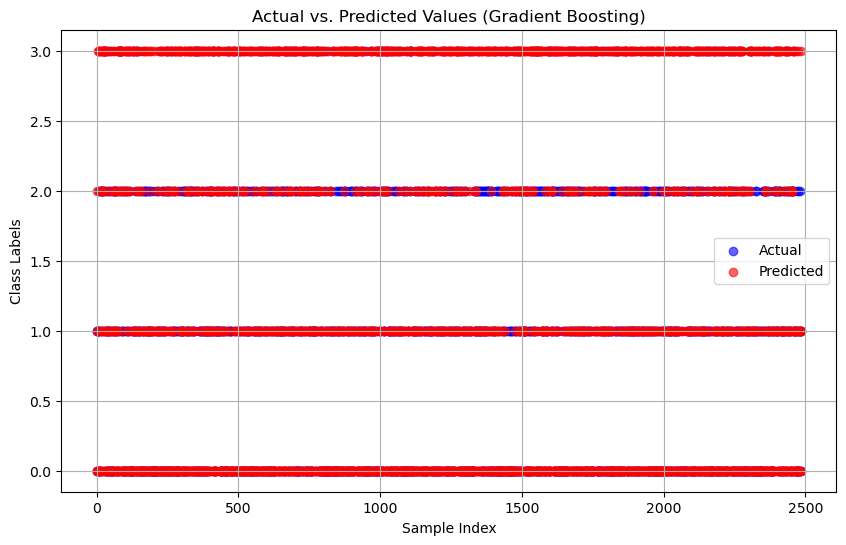

In [31]:
import matplotlib.pyplot as plt

# Create a scatter plot for actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual', alpha=0.6, color='blue')
plt.scatter(range(len(y_pred)), y_pred, label='Predicted', alpha=0.6, color='red')
plt.title("Actual vs. Predicted Values (Gradient Boosting)")
plt.xlabel("Sample Index")
plt.ylabel("Class Labels")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#This scatter plot illustrates the comparison between the actual and predicted class labels for a classification model. 
#The y-axis represents the discrete class labels (e.g., 0, 1, 2, 3), while the x-axis shows the sample indices. 
#The blue points represent the actual values (ground truth), and the red points represent the predicted values from the model.
#When the red and blue points overlap for a given sample index, it indicates a correct prediction, while any divergence between them highlights a misclassification. 
#The horizontal bands reflect the discrete nature of the class labels.

# Random Forest Model

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=100,  # Number of trees in the forest
    max_depth=None,    # Maximum depth of the trees (None means no limit)
    class_weight='balanced'  # Handles class imbalance
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf  = precision_score(y_test, y_pred, average='weighted')
recall_rf  = recall_score(y_test, y_pred, average='weighted')
f1_rf  = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy_rf :.2f}")
print(f"Precision: {precision_rf :.2f}")
print(f"Recall: {recall_rf :.2f}")
print(f"F1 Score: {f1_rf :.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.56
Precision: 0.55
Recall: 0.56
F1 Score: 0.55

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       959
           1       0.50      0.45      0.47       753
           2       0.32      0.32      0.32       504
           3       0.20      0.21      0.20       270

    accuracy                           0.56      2486
   macro avg       0.46      0.46      0.46      2486
weighted avg       0.55      0.56      0.55      2486



# K-Nearest Neighbors (KNN) Model

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Initialize the KNN model
knn_model = KNeighborsClassifier(
    n_neighbors=5,  # Number of neighbors to use
    weights='uniform',  # Uniform weights for neighbors (or 'distance' for weighted)
    algorithm='auto'    # Automatically selects the best algorithm
)

# Train the KNN model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred, average='weighted')
recall_knn = recall_score(y_test, y_pred, average='weighted')
f1_knn = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy_knn:.2f}")
print(f"Precision: {precision_knn:.2f}")
print(f"Recall: {recall_knn:.2f}")
print(f"F1 Score: {f1_knn:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.53
Precision: 0.49
Recall: 0.53
F1 Score: 0.50

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.86      0.76       959
           1       0.43      0.42      0.42       753
           2       0.34      0.29      0.31       504
           3       0.22      0.10      0.13       270

    accuracy                           0.53      2486
   macro avg       0.42      0.41      0.41      2486
weighted avg       0.49      0.53      0.50      2486



In [26]:
import pandas as pd

# Create a dictionary to store the evaluation metrics for each model
results = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting", "K-Nearest Neighbors"],
    "Accuracy": [accuracy_log, accuracy_dt, accuracy_rf, accuracy_gb, accuracy_knn],
    "Precision": [precision_log, precision_dt, precision_rf, precision_gb, precision_knn],
    "Recall": [recall_log, recall_dt, recall_rf, recall_gb, recall_knn],
    "F1 Score": [f1_log, f1_dt, f1_rf, f1_gb, f1_knn]
}

# Convert the dictionary to a pandas DataFrame
results_df = pd.DataFrame(results)


# Display the results table
sorted_results_df = results_df.sort_values(by="Accuracy", ascending=False)
print("Model Comparison:")
print(sorted_results_df)




Model Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score
3    Gradient Boosting  0.670555   0.660995  0.670555  0.645085
0  Logistic Regression  0.621078   0.656537  0.621078  0.618211
2        Random Forest  0.557924   0.552570  0.557924  0.554381
4  K-Nearest Neighbors  0.525744   0.485433  0.525744  0.498764
1        Decision Tree  0.508850   0.519529  0.508850  0.513849


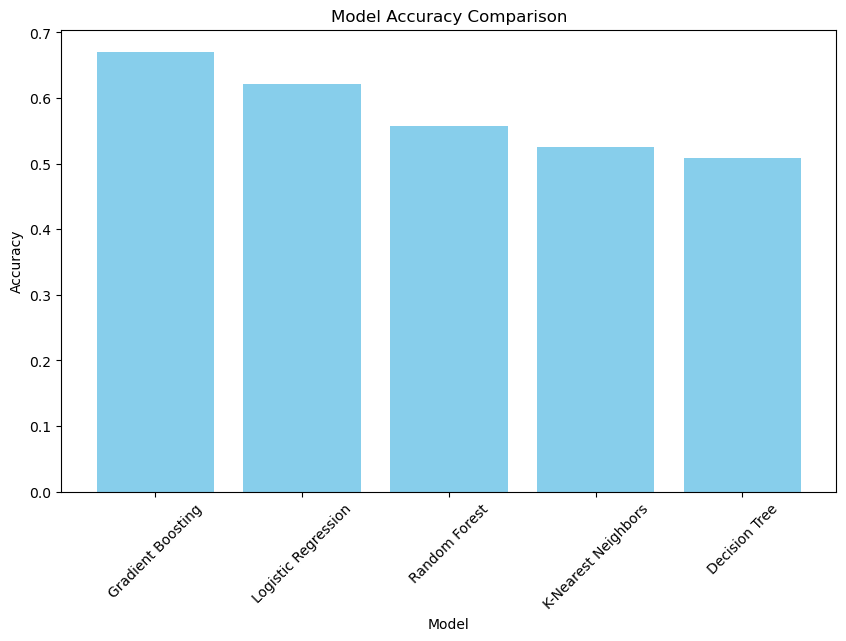

In [32]:
import matplotlib.pyplot as plt

# Plot Accuracy for each model
plt.figure(figsize=(10, 6))
plt.bar(sorted_results_df["Model"], sorted_results_df["Accuracy"], color='skyblue')
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()


# Hyperparameter Tuning

# Tuning Gradient Boosting with GridSearchCV

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],      # Step size shrinkage
    'max_depth': [3, 5, 7],                 # Maximum depth of trees
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],          # Minimum samples required to be at a leaf node
}

# Set up the GridSearchCV
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    scoring='accuracy',         # Evaluation metric
    cv=3,                       # 3-fold cross-validation
    verbose=1,                  # Display progress
    n_jobs=-1                   # Use all available processors
)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_:.2f}")

# Get the best estimator
best_gb_model = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_gb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nTest Set Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")



Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.69

Test Set Metrics:
Accuracy: 0.68
Precision: 0.63
Recall: 0.68
F1 Score: 0.64


# Tuning Gradient Boosting with RandomizedSearchCV

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Define the parameter distribution
param_dist = {
    'n_estimators': [50, 100, 200, 300],          # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1, 0.2],     # Step size shrinkage
    'max_depth': [3, 5, 7, 10],                  # Maximum depth of trees
    'min_samples_split': [2, 5, 10, 20],         # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 8],            # Minimum samples required to be at a leaf node
}

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist,
    n_iter=50,               # Number of random combinations to try
    scoring='accuracy',      # Evaluation metric
    cv=3,                    # 3-fold cross-validation
    verbose=1,               # Display progress
    random_state=42,         # Ensure reproducibility
    n_jobs=-1                # Use all available processors
)

# Perform the random search
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Accuracy: {random_search.best_score_:.2f}")

# Get the best estimator
best_gb_model = random_search.best_estimator_

# Evaluate on the test set
y_pred = best_gb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nTest Set Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")



Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_depth': 3, 'learning_rate': 0.05}
Best Accuracy: 0.69

Test Set Metrics:
Accuracy: 0.68
Precision: 0.65
Recall: 0.68
F1 Score: 0.64


# Tuning Randomforest with GridSearchCV

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],           # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],          # Maximum depth of trees
    'min_samples_split': [2, 5, 10],          # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],            # Minimum samples at a leaf node
    'class_weight': ['balanced', 'balanced_subsample']  # Handle class imbalance
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='accuracy',        # Evaluation metric
    cv=3,                      # 3-fold cross-validation
    verbose=2,                 # Display progress
    n_jobs=-1                  # Use all available processors
)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_:.2f}")

# Get the best estimator
best_rf_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_rf_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print test set results
print("\nTest Set Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters: {'class_weight': 'balanced_subsample', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best Accuracy: 0.66

Test Set Metrics:
Accuracy: 0.64
Precision: 0.65
Recall: 0.64
F1 Score: 0.62


# Tuning Randomforest with RandomizedSearchCV

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter distribution
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400],       # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40],           # Maximum depth of trees
    'min_samples_split': [2, 5, 10, 20],           # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4, 8],              # Minimum samples at a leaf node
    'class_weight': ['balanced', 'balanced_subsample'],  # Handle class imbalance
    'criterion': ['gini', 'entropy']               # Splitting criterion
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=50,                # Number of random combinations to try
    scoring='accuracy',       # Evaluation metric
    cv=3,                     # 3-fold cross-validation
    verbose=2,                # Display progress
    random_state=42,          # Ensure reproducibility
    n_jobs=-1                 # Use all available processors
)

# Perform the random search
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Accuracy: {random_search.best_score_:.2f}")

# Get the best estimator
best_rf_model = random_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_rf_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print test set results
print("\nTest Set Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_depth': 20, 'criterion': 'entropy', 'class_weight': 'balanced'}
Best Accuracy: 0.66

Test Set Metrics:
Accuracy: 0.63
Precision: 0.65
Recall: 0.63
F1 Score: 0.62


In [ ]:
#After comparision,tuning with RandomizedSearchCV is preferable as:
#1.Similar performance to Model 1 but with higher precision and fewer estimators, making it more efficient.
#2.The reduced complexity (fewer estimators) is an added advantage without compromising accuracy or recall.

# k-fold cross-validation

In [38]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# Initialize the model
model = GradientBoostingClassifier(
    learning_rate=0.05, 
    max_depth=3, 
    min_samples_leaf=8, 
    min_samples_split=10, 
    n_estimators=50, 
    random_state=42
)

# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Perform cross-validation
cv_accuracy = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
cv_precision = cross_val_score(model, X_train, y_train, cv=kf, scoring='precision_weighted')
cv_recall = cross_val_score(model, X_train, y_train, cv=kf, scoring='recall_weighted')
cv_f1 = cross_val_score(model, X_train, y_train, cv=kf, scoring='f1_weighted')

# Calculate mean and standard deviation
accuracy_mean = np.mean(cv_accuracy)
accuracy_std = np.std(cv_accuracy)

precision_mean = np.mean(cv_precision)
precision_std = np.std(cv_precision)

recall_mean = np.mean(cv_recall)
recall_std = np.std(cv_recall)

f1_mean = np.mean(cv_f1)
f1_std = np.std(cv_f1)

# Print results
print("Cross-Validation Results:")
print(f"Accuracy: Mean = {accuracy_mean:.2f}, Std = {accuracy_std:.2f}")
print(f"Precision: Mean = {precision_mean:.2f}, Std = {precision_std:.2f}")
print(f"Recall: Mean = {recall_mean:.2f}, Std = {recall_std:.2f}")
print(f"F1 Score: Mean = {f1_mean:.2f}, Std = {f1_std:.2f}")






Cross-Validation Results:
Accuracy: Mean = 0.69, Std = 0.01
Precision: Mean = 0.69, Std = 0.02
Recall: Mean = 0.69, Std = 0.01
F1 Score: Mean = 0.66, Std = 0.02


# Feature Importance

Feature Importance:
                                           Feature  Importance
6                      Cognitive Memory Assessment    0.651594
8                    Cognitive Judgment Assessment    0.247927
7                 Cognitive Orientation Assessment    0.033717
0                                       Birth Year    0.023308
2                               Years of Education    0.013207
5                Decision-Making Cognitive Decline    0.009222
9              Family History of Cognitive Decline    0.004867
11                     Neuropsychological Genetics    0.004629
10                                Other Biomarkers    0.004211
3   Cognitive Decline due to Cardiovascular Issues    0.003474
1                                              Sex    0.001995
4                  Cognitive Decline due to Stroke    0.001849


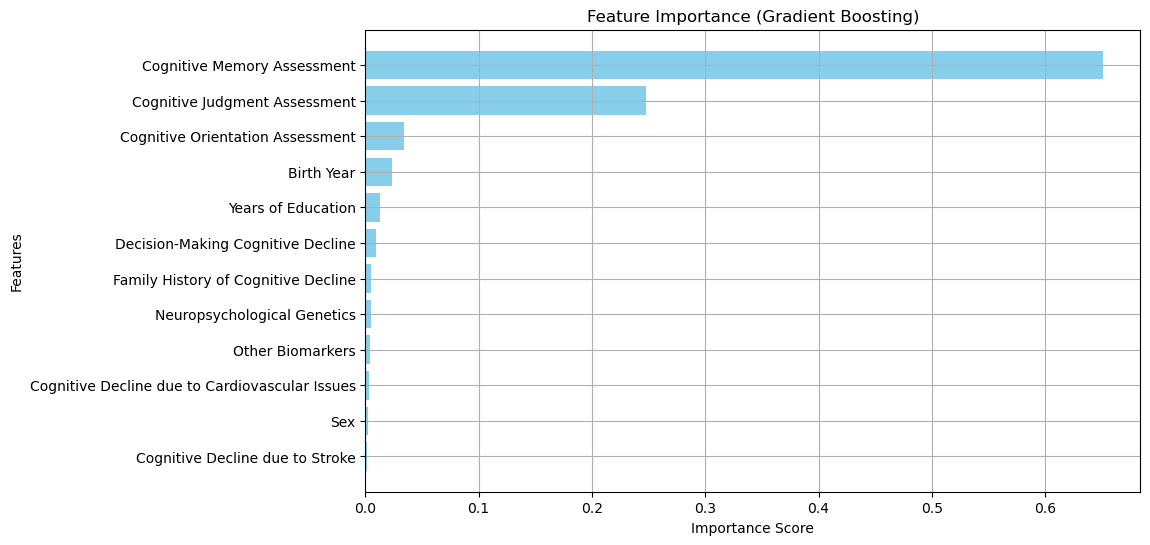

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Train the Gradient Boosting model
gb_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = gb_model.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print the feature importance DataFrame
print("Feature Importance:")
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Reverse the order for better visualization
plt.title('Feature Importance (Gradient Boosting)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(True)
plt.show()


In [41]:
import joblib

# Save the model
joblib.dump(random_search, 'gradient_boosting_model.pkl')
print("Model saved as 'gradient_boosting_model.pkl'")


Model saved as 'gradient_boosting_model.pkl'
